## Nomis Clustering - Modeling the datasets using Machine learning and Statistical analysis

In [1]:
import pandas as pd
import numpy as np
from math import sqrt
import seaborn as sns
%pylab inline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

Populating the interactive namespace from numpy and matplotlib


/Users/eli/anaconda3/envs/special_topics/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['sqrt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


### Loading Dataset

In [2]:
df = pd.read_csv("Nomis Solutions_Data Part I.csv")

In [3]:
df.head()

,Tier,FICO,Approve Date,Term,Amount,Previous Rate,Car Type,Competition rate,Outcome,Rate,Cost of Funds,Partner Bin
0,3.0,695.0,7/1/02,72.0,35000.0,,N,6.25,0.0,7.49,1.8388,1.0
1,1.0,751.0,7/1/02,60.0,40000.0,,N,5.65,0.0,5.49,1.8388,3.0
2,1.0,731.0,7/1/02,60.0,18064.0,,N,5.65,0.0,5.49,1.8388,3.0
3,4.0,652.0,7/1/02,72.0,15415.0,,N,6.25,0.0,8.99,1.8388,3.0
4,1.0,730.0,7/1/02,48.0,32000.0,,N,5.65,0.0,5.49,1.8388,1.0


### Data Preprocessing 

In [4]:
# Replace column name for standard formats
df.columns = [c.replace('  ', ' ').replace(' ', '_').lower() for c in df.columns]
# Keep only cluster columns
df = df.drop('approve_date', 1)
# Drop NANs
df.dropna(inplace=True)
# Replace spaces in previous rate with 0 and make column to float
df.previous_rate = df.previous_rate.apply(lambda x:0 if x == ' ' else float(x))
# Make a copy
df_copy = df.copy()
# Add individual columns for car types
df = pd.get_dummies(df)
## Make all to float values
df = df.apply(lambda x:x.astype(float))

In [5]:
df.head()

,tier,fico,term,amount,previous_rate,competition_rate,outcome,rate,cost_of_funds,partner_bin,car_type_N,car_type_R,car_type_U
0,3.0,695.0,72.0,35000.0,0.0,6.25,0.0,7.49,1.8388,1.0,1.0,0.0,0.0
1,1.0,751.0,60.0,40000.0,0.0,5.65,0.0,5.49,1.8388,3.0,1.0,0.0,0.0
2,1.0,731.0,60.0,18064.0,0.0,5.65,0.0,5.49,1.8388,3.0,1.0,0.0,0.0
3,4.0,652.0,72.0,15415.0,0.0,6.25,0.0,8.99,1.8388,3.0,1.0,0.0,0.0
4,1.0,730.0,48.0,32000.0,0.0,5.65,0.0,5.49,1.8388,1.0,1.0,0.0,0.0


In [6]:
df.tier.count()

208077

### Clustering:  Analyzing best clusters with cross validation on sample using kmeans silhouette scores

In [7]:
def find_cv_silhouette_scores(df,max_size=20):
    """Run a three fold CV on 10,000 samples from the dataframe to determine the ideal number of clusters.
    Output is the ideal number of clusters of 3 CV folds with 10k samples."""
    silhouette_scores = []
    for clusters in range(2,120):
        knn_classifier = KMeans(clusters)
        this_silhouette_scores = []
        for _ in range(3): ## CV for samples
            sample = df.sample(10000)
            fit_knn = knn_classifier.fit(X=sample.values)
            predicted_labels = fit_knn.labels_
            this_silhouette_scores.append(silhouette_score(X=sample,labels=predicted_labels))
        silhouette_scores.append(np.mean(this_silhouette_scores))
        print('Finished iteration {}'.format(clusters))
    number_of_clusters = [i for i in range(2,120)]
    plt.plot([i for i in range(2,120)],silhouette_scores)
    plt.title('Ideal Number of Clusters')
    plt.ylabel('Silhouette score')
    plt.xlabel('Number of clusters')
    print('The best number of clusters is {}'.format(number_of_clusters[np.argmax(np.array(silhouette_scores))]))

Finished iteration 2
Finished iteration 3
Finished iteration 4
Finished iteration 5
Finished iteration 6
Finished iteration 7
Finished iteration 8
Finished iteration 9
Finished iteration 10
Finished iteration 11
Finished iteration 12
Finished iteration 13
Finished iteration 14
Finished iteration 15
Finished iteration 16
Finished iteration 17
Finished iteration 18
Finished iteration 19
Finished iteration 20
Finished iteration 21
Finished iteration 22
Finished iteration 23
Finished iteration 24
Finished iteration 25
Finished iteration 26
Finished iteration 27
Finished iteration 28
Finished iteration 29
Finished iteration 30
Finished iteration 31
Finished iteration 32
Finished iteration 33
Finished iteration 34
Finished iteration 35
Finished iteration 36
Finished iteration 37
Finished iteration 38
Finished iteration 39
Finished iteration 40
Finished iteration 41
Finished iteration 42
Finished iteration 43
Finished iteration 44
Finished iteration 45
Finished iteration 46
Finished iteration

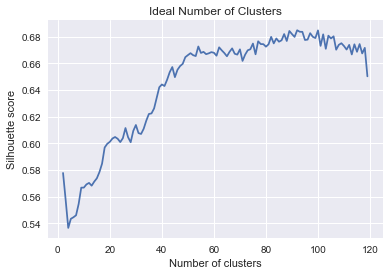

In [8]:
# This takes ~30 minutes to run
find_cv_silhouette_scores(df)

### Augmenting data with cluster numbers

In [8]:
def find_clusters(df,cluster_size=4):
    """Using the cluster size for the number of centers, find the cluster index in the dataset"""
    sample = df
    knn_classifier = KMeans(cluster_size)
    fit_knn = knn_classifier.fit(X=sample.values)
    predicted_labels = fit_knn.labels_
    centers = fit_knn.cluster_centers_
    print(centers)
    return predicted_labels

In [9]:
## store the cluster labels
df_labels = find_clusters(df, 92)

[[  1.81622517e+00   7.29443709e+02   6.25629139e+01 ...,   8.62582781e-01
    5.29801325e-02   8.44370861e-02]
 [  1.98793301e+00   7.26034433e+02   5.72094039e+01 ...,   7.19234370e-01
    6.48080724e-02   2.15957557e-01]
 [  2.19693039e+00   7.17244920e+02   5.33852140e+01 ...,   3.28361435e-01
    3.39386079e-01   3.32252486e-01]
 ..., 
 [  1.96524064e+00   7.24521925e+02   5.90887701e+01 ...,   4.82352941e-01
    3.31016043e-01   1.86631016e-01]
 [  1.76666667e+00   7.33238889e+02   6.08000000e+01 ...,   8.83333333e-01
    4.44444444e-02   7.22222222e-02]
 [  1.92793682e+00   7.27383021e+02   6.16406713e+01 ...,   7.12734452e-01
    1.58933860e-01   1.28331688e-01]]


In [10]:
# Check number of data points in clusters
numcdp = pd.Series(df_labels).value_counts()
numcdp

25    13202
8     10206
1      9613
7      8136
17     7241
16     4842
2      4629
10     4456
28     4437
74     4035
44     3962
14     3819
26     3779
53     3718
3      3642
55     3631
40     3610
19     3314
37     3306
18     3203
27     3188
32     3138
35     3104
34     3067
36     3050
33     3023
50     2973
43     2830
80     2619
59     2598
      ...  
79     1174
42     1146
91     1013
24     1001
60      932
83      830
61      808
52      788
65      759
22      640
0       604
23      589
4       588
57      397
70      372
38      235
78      221
58      201
90      180
62      169
51      163
9       137
88      124
31       80
48       51
5        45
13       41
20       37
64       28
49       20
Length: 92, dtype: int64

In [11]:
df['cluster_number'] = pd.Series(df_labels)

In [12]:
df[df.cluster_number == np.nan]

,tier,fico,term,amount,previous_rate,competition_rate,outcome,rate,cost_of_funds,partner_bin,car_type_N,car_type_R,car_type_U,cluster_number


Text(0,0.5,'Frequency')

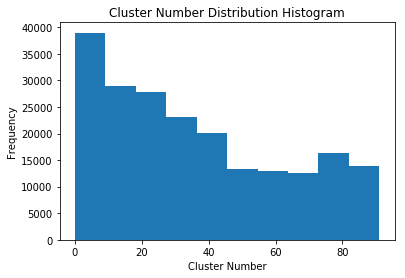

In [13]:
plt.hist(pd.Series(df_labels))
plt.title("Cluster Number Distribution Histogram")
plt.xlabel("Cluster Number")
plt.ylabel("Frequency")

In [14]:
def create_lcmodel_per_cluster(df,cluster_size=4):
    """Create a logistic regression model for each cluster to predict outcome 
    Return RMSE and model for each cluster.
    """
    rmses = []
    models = []
    for i in range(cluster_size):        
        clusterdf = df[df.cluster_number==i]
        df_X =clusterdf.loc[:,('tier', 'fico', 'term', 'amount', 'rate', 'partner_bin', \
       'previous_rate', 'competition_rate', 'cost_of_funds',\
        'car_type_N', 'car_type_R', 'car_type_U')]        
        df_y = clusterdf['outcome']
        # train test split
        X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.4)
        # create the classifier
        logcmodel = LogisticRegression()
        if np.sum(y_train) in [len(y_train),0]:
            print ("all in class " , np.unique(y_train), " for cluster", i)
        else:
            logcmodel.fit(X_train,y_train)
            predictions = logcmodel.predict(X_test)
            rmses.append(np.linalg.norm(y_test - predictions)/sqrt(len(y_test)))
            models.append(logcmodel)
    return rmses, models

In [15]:
rmses, models = create_lcmodel_per_cluster(df, 92)

In [16]:
rmses

[0.2489647988659846,
 0.30509625259733031,
 0.52988445702528042,
 0.34755741466113188,
 0.42685289015128908,
 0.57735026918962573,
 0.55799221442177072,
 0.39394619920395257,
 0.18909791395714529,
 0.30151134457776363,
 0.31684790791017625,
 0.57772215345954858,
 0.26298075690946077,
 0.54232614454664041,
 0.53110080288700856,
 0.22079738749768443,
 0.39811118321043454,
 0.17428784035165085,
 0.2634820238860261,
 0.55808874451754031,
 0.2581988897471611,
 0.54075759131349876,
 0.22534695471649932,
 0.23470139701908863,
 0.53318784382990203,
 0.22778084392111064,
 0.16666666666666666,
 0.58521490841246793,
 0.2511943302491037,
 0.52030590237301644,
 0.52872461506355917,
 0.39528470752104738,
 0.54859403388365324,
 0.31491832864888675,
 0.27382407692143229,
 0.53912913614720748,
 0.5573649950480547,
 0.50094393136696824,
 0.39946773096848059,
 0.56745043836444431,
 0.41857825580491753,
 0.37282185960072001,
 0.29149154406506872,
 0.27077953166795682,
 0.37001150975362607,
 0.576201312291

In [17]:
df.to_csv('clustered_data.csv')

In [18]:
df.head()

,tier,fico,term,amount,previous_rate,competition_rate,outcome,rate,cost_of_funds,partner_bin,car_type_N,car_type_R,car_type_U,cluster_number
0,3.0,695.0,72.0,35000.0,0.0,6.25,0.0,7.49,1.8388,1.0,1.0,0.0,0.0,8.0
1,1.0,751.0,60.0,40000.0,0.0,5.65,0.0,5.49,1.8388,3.0,1.0,0.0,0.0,17.0
2,1.0,731.0,60.0,18064.0,0.0,5.65,0.0,5.49,1.8388,3.0,1.0,0.0,0.0,14.0
3,4.0,652.0,72.0,15415.0,0.0,6.25,0.0,8.99,1.8388,3.0,1.0,0.0,0.0,86.0
4,1.0,730.0,48.0,32000.0,0.0,5.65,0.0,5.49,1.8388,1.0,1.0,0.0,0.0,28.0
